In [12]:
import sys
base_dir = "D:/Thesis/Cobra/cobra/"
if base_dir not in sys.path:
    sys.path.append(base_dir)
from os.path import join
import pandas as pd
from utilities import basic, utils, mri_stats, stats
from stats_tools import vis as svis
import numpy as np
import chart_studio.plotly as py
import plotly.express as px
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
fig_dir = join(base_dir, 'figs')

In [38]:
table_dir = join(base_dir, 'data/tables')
df = utils.load_scan_csv(join(table_dir, 'neg_pos.csv'))
df_n = utils.load_scan_csv(join(table_dir, 'neg_all.csv'))

C:\Users\klein\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: DtypeWarning:

Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.

C:\Users\klein\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: DtypeWarning:

Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.



In [7]:
TE_k = 'EchoTime'
TR_k = 'RepetitionTime'
TI_k = 'InversionTime'
FA_k = 'FlipAngle'
SD_k = 'SeriesDescription'
PID_k = 'PatientID'
time_k = 'InstanceCreationTime'
date_k = 'InstanceCreationDate'
DT_k = 'DateTime'
SID_k = 'SeriesInstanceUID'
SS_k = 'ScanningSequence'
SV_k = 'SequenceVariant'
SN_k = 'SequenceName'
SO_k = 'ScanOptions'
ETL_k = 'EchoTrainLength'
MFS_k = 'MagneticFieldStrength'
df.keys()

Index(['AcquisitionContrast', 'AcquisitionDuration', 'AcquisitionMatrix',
       'AngioFlag', 'Columns', 'DateTime', 'EchoNumbers', 'EchoTime',
       'EchoTrainLength', 'FlipAngle', 'FrameOfReferenceUID', 'ImageType',
       'ImagedNuclues', 'ImagesInAcquisition', 'ImagingFrequency',
       'InstanceCreationDate', 'InstanceCreationTime', 'InversionTime',
       'MRAcquisitionType', 'MagneticFieldStrength', 'Manufacturer',
       'ManufacturerModelName', 'NumberOfEchoes', 'NumberofAverages',
       'NumberofPhaseEncodingSteps', 'PatientID', 'PatientPosition',
       'PatientPosition.1', 'PhotometricInterpretation', 'PixelBandwith',
       'PixelPresentation', 'PixelSpacing', 'PulseSequenceName',
       'RepetitionTime', 'Rows', 'ScanOptions', 'ScanningSequence',
       'SecondEcho', 'SequenceName', 'SequenceVariant', 'SeriesDescription',
       'SeriesInstanceUID', 'SliceThickness', 'SoftwareVersions',
       'SpacingBetweenSlices', 'StudyInstanceUID', 'StudyPriorityID',
       'Variab

## Time of the scans

In [24]:
ps_datetime_count_p = df_p.groupby(
    [df_p[DT_k].dt.year, df_p[DT_k].dt.month]).count()[SID_k]
ps_datetime_count_n = df_n.groupby(
    [df_n[DT_k].dt.year, df_n[DT_k].dt.month]).count()[SID_k]
year_month_keys_p = [str(int(key[1]))+'/'+str(key[0])[:4]
                   for key in ps_datetime_count_p.keys()]
year_month_keys_n = [str(int(key[1]))+'/'+str(key[0])[:4]
                   for key in ps_datetime_count_n.keys()]                   
year_month_keys_n#, year_month_keys_p 

[]

(<Figure size 936x504 with 1 Axes>,
 <AxesSubplot:title={'center':'Number of acquired volumes for positive patients'}, xlabel='month/year', ylabel='count'>)

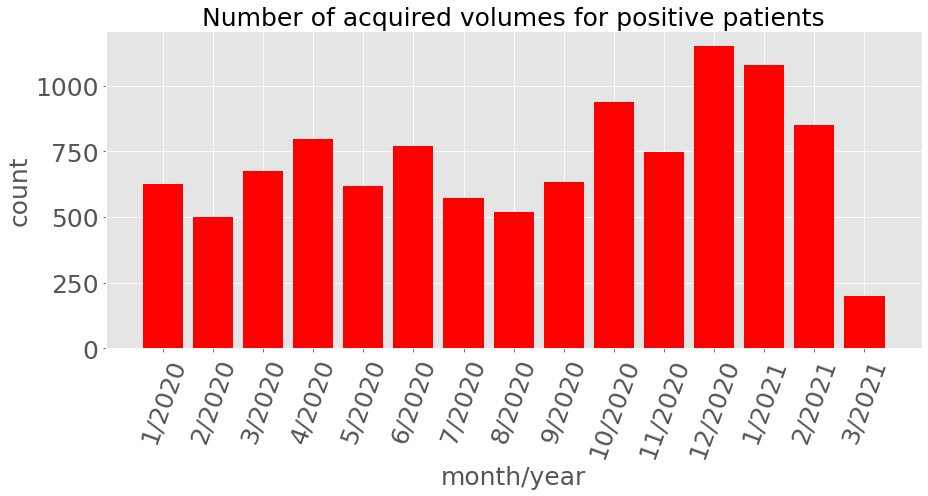

In [18]:

year_month_keys.insert(-1, '5/2021')  # this month is missing
year_month_counts = ps_datetime_count.values
year_month_counts = np.insert(year_month_counts, -1, 0)

px
svis.bar(year_month_keys[:-3], year_month_counts[:-3], figsize=(13, 7),
    save=(True), figname=f"{fig_dir}/scans_months_years.png",
    kwargs = {'xlabel':'month/year', 
              'title':'Number of acquired volumes for positive patients',
              'xtickparams_rot':70,
              })